In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# One Rule (oneR)

In [10]:
def load() -> pd.DataFrame:
    """Loading dataset
    @return: dataset
    """
    dataset = pd.read_csv('data_set.csv')
    # dataset = dataset.fillna("[NULL]")
    dataset = dataset.fillna(method='bfill')

    # dataset = dataset.fillna(method='bfill')
    dataset.drop('test_date', 1, inplace=True)
    return dataset

def copy_df(df) -> pd.DataFrame:
    """copy df to new temp df
    @param df: user input dataset
    @return: new df
    """
    return df.copy()

def print_dataset(dataset) -> None:
    """print dataset inforamtion
    @param dataset: user input dataset
    @return: print dataset information via head(), info(), shape()
    """
    print(dataset.head())
    print(dataset.info())
    print(dataset.describe())
    print(dataset.columns)
    print(dataset.iloc[:, -1:].value_counts())

dataset = load()
# print_dataset(dataset)

In [ ]:
# ToDo:
# 1. Update k-fold function
# 2. Update cross_validation function
# 3. Update train_test_split function

def k_fold(x_data, y_data, k_fold_number, shuffle=True, random_state=None):
    if random_state != None:
        np.random.seed(random_state)

    dataset = concat_data(x_data, y_data)
    if shuffle == True:
        dataset = dataset.sample(frac=1).reset_index(drop=True)
    dataset_size = len(dataset)
    fold_size = int(dataset_size / k_fold_number)
    indices = np.arange(dataset_size)
    if k_fold_number <= 1:
        raise ValueError("K-fold cross validation requires at least 2 folds")
    else:
        for index in range(k_fold_number):
            test_indices = indices[index * fold_size : (index + 1) * fold_size]
            train_indices =  np.delete(indices, test_indices)
            x_train = dataset.iloc[train_indices, :-1].reset_index(drop=True)
            y_train = dataset.iloc[train_indices, -1].reset_index(drop=True)
            x_test = dataset.iloc[test_indices, :-1].reset_index(drop=True)
            y_test = dataset.iloc[test_indices, -1].reset_index(drop=True)
            yield x_train, y_train, x_test, y_test

def cross_validation(x_data, y_data, k_fold_number, scoring, initial_theta, shuffle=True, alpha=0.1, lambda_param=1, verbose=True):
    pass


In [11]:
# def k_fold(k_fold_number, data) -> list:
#     """"split dataset into k_fold_number parts
#     @param k_fold_number: number of folds provided by user
#     @param data: user dataset
#     @rtype: list
#     @return: x_train, x_test, y_train, y_test
#     """

#     if isinstance(k_fold_number, float) :
#         k_fold_number = int(k_fold_number)
    
#     # shuffle dataset with pandas sample method
#     dataset = data.sample(frac=1).reset_index(drop=True)
#     temp_data = dataset
#     x_train, x_test, y_train, y_test = [], [], [], []

#     if k_fold_number > 1:
#         # split dataset into k_fold_number parts
#         test_size = len(temp_data) // k_fold_number
#         for _ in range(k_fold_number):
#             test_indexes = np.random.choice(
#                 temp_data.index, test_size, replace=False)
#             x_test.append(temp_data.iloc[test_indexes,
#                                          0:-1].reset_index(drop=True))
#             y_test.append(
#                 temp_data.iloc[test_indexes, -1:].reset_index(drop=True))
#             train_df = temp_data.drop(test_indexes)
#             x_train.append(train_df.iloc[:, 0:-1].reset_index(drop=True))
#             y_train.append(train_df.iloc[:, -1:].reset_index(drop=True))
#             temp_data = dataset
    
#     if k_fold_number == 1:
#         print("k fold number should not be 1 or less than")
#         index = np.random.choice(temp_data.index, 800 , replace=False)
#         x_test.append(temp_data.iloc[index, 0:-1].reset_index(drop=True))
#         y_test.append(temp_data.iloc[index, -1:].reset_index(drop=True))
#         train_df = temp_data.drop(index)
#         x_train.append(train_df.iloc[:, 0:-1].reset_index(drop=True))
#         y_train.append(train_df.iloc[:, -1:].reset_index(drop=True))
    
#     if k_fold_number < 1:
#         raise ValueError("A very bad number have been specified as fold !!!")

#     return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = k_fold(k_fold_number=5, data=dataset)

In [12]:
def get_x_train_x_test_y_train_y_test(x_train, x_test, y_train, y_test) -> None:
    """print x_train, x_test, y_train, y_test
    @param x_train: train data features
    @param x_test: test data features
    @param y_train: train data label
    @param y_test: test data label
    @return: print head() of x_train, x_test, y_train and y_test
    """
    for index in range(len(x_train)):
        print(f"x_train[{index}]:","\n", x_train[index].head())
        print(f"x_test[{index}]:","\n", x_test[index].head())
        print(f"y_train[{index}]:","\n", y_train[index].head())
        print(f"y_test[{index}]:","\n", y_test[index].head())

# get_x_train_x_test_y_train_y_test(x_train, x_test, y_train, y_test)

In [13]:
def concat_data(x_train, x_test, y_train, y_test) -> list:
    """concatenate <x_train:y_train>, <x_test:y_test>
    @param x_train: train data features
    @param x_test: test data features
    @param y_train: train data label
    @param y_test: test data label
    @return: train_dataframe with labels, test_dataframe with labels
    """
    for index, _ in enumerate(x_train):
        x_train[index] = x_train[index].assign(
            corona_result=y_train[index]['corona_result'])
        x_test[index] = x_test[index].assign(
            corona_result=y_test[index]['corona_result'])
    return x_train, x_test

def one_rule_fit(data) -> list:
    """fit model on train data
    then group by feature and value and calculate frequency and sum of frequency of each feature-value pair
    @param data: whole dataset
    @return: dataframe of each Feature-Value pair
    """
    summarized_table_list = []
    intermediate_result_for_confidence_and_support = []
    for index, _ in enumerate(data):
        result = pd.DataFrame()
        for column in data[index]:
            if column != "corona_result":
                # extract feature-value-frequency-label pair from dataset
                intermediate_df = data[index].groupby(
                    column)['corona_result'].value_counts(dropna=False)
                result = result.append(pd.DataFrame({'Feature': intermediate_df.index.names[0], 'Value': pd.DataFrame(intermediate_df.index.to_flat_index())[0].apply(pd.Series)[
                    0], 'Frequency': intermediate_df.values, 'Predict': pd.DataFrame(intermediate_df.index.to_flat_index())[0].apply(pd.Series)[1]}), ignore_index=True)

        # summarizing rules by higher accuracy
        result.groupby(['Feature', 'Value'], as_index=False)['Frequency'].max().merge(
            result, on=['Feature', 'Value', 'Frequency'])

        ####################
        intermediate_result_for_confidence_and_support.append(result)
        # print(result)
        ####################

        # Adding error_rate column for each feature
        group = result.groupby(['Feature', 'Value'])['Frequency']
        summarized_table_list.append((result.assign(Error=group.transform(sum) -
                                           result['Frequency']).loc[group.idxmax()].reset_index(drop=True)))

    return summarized_table_list, intermediate_result_for_confidence_and_support

x_train, x_test = concat_data(x_train, x_test, y_train, y_test)
train_data_classified, inter_result_train = one_rule_fit(x_train)
test_data_classified, inter_result_test = one_rule_fit(x_test)

In [14]:
print(train_data_classified[0].head(50))
# print(test_data_classified[0].head())

                Feature                   Value  Frequency   Predict  Error
0      age_60_and_above                      No       2527  negative    125
1      age_60_and_above                     Yes        531  negative     17
2                 cough                     0.0       3029  negative    124
3                 cough                     1.0         29  negative     18
4                 fever                     0.0       3026  negative    120
5                 fever                     1.0         32  negative     22
6                gender                  female       1610  negative     69
7                gender                    male       1448  negative     73
8             head_ache                     0.0       3054  negative    124
9             head_ache                     1.0         18  positive      4
10  shortness_of_breath                     0.0       3058  negative    137
11  shortness_of_breath                     1.0          5  positive      0
12          

In [ ]:
def calculate_support(data, temp_data) -> pd.DataFrame:
    """Calculate support of each class
    @param data: dataframe of each Feature-Value pair
    @param temp_data: dataframe of each Feature-Value pair
    @return: dataframe of each Feature-Value pair with support
    """
    auxilary_df = data.loc[data.groupby(['Feature', 'Value'])['Frequency'].idxmax()]
    data_size = len(temp_data)
    for index, row in auxilary_df.iterrows():
        row_frequency = auxilary_df.at[index, 'Frequency']
        auxilary_df.at[index, 'Support'] = row_frequency/data_size*100
    return auxilary_df

def calculate_confidence(data, temp_df) -> pd.DataFrame:
    """Calculate confidence of each rule with support as numerator
        @param data: summarized dataframe with support column
        @param temp_df: summarized dataframe with support column
        @return: summarized dataframe with confidence column
    """
    for index, row in data.iterrows():
        row_feature = data.at[index, 'Feature']
        row_value = data.at[index, 'Value']
        x_rule_frequency = np.sum((temp_df[row_feature] == row_value).values)
        data.at[index, 'Confidence'] = (data.at[index, 'Frequency'] / x_rule_frequency) * 100
    return data

def calculate_lift(data, temp_df) -> pd.DataFrame:
    """Calculate lift of each rule with confidence as numerator
        @param data: summarized dataframe with confidence column
        @param temp_df: summarized dataframe with support column
        @return: summarized dataframe with lift column
    """
    for index, row in data.iterrows():
        row_feature = data.at[index, 'Feature']
        row_value = data.at[index, 'Value']
        x_rule_frequency = np.sum((temp_df[row_feature] == row_value).values)
        data.at[index, 'Lift'] = (data.at[index, 'Support'] / x_rule_frequency) * 100
    return data

def get_support_confidence_lift(data, temp_df) -> list:
    """Calculate error rate of each class, input data is dict
    @param data: result of train_df or test_df in one_rule_classifier, 
    @return confidence and support
    """
    data_with_support_confidence_lift_column = list()
    for index, value in enumerate(data):
        data_with_support_confidence_lift_column.append(calculate_support(value, temp_df[index]))
        data_with_support_confidence_lift_column[index] = calculate_confidence(data_with_support_confidence_lift_column[index], temp_df[index])
        data_with_support_confidence_lift_column[index] = calculate_lift(data_with_support_confidence_lift_column[index], temp_df[index])
    return data_with_support_confidence_lift_column

data_with_support_confidence_lift_column = get_support_confidence_lift(inter_result_train, copy_df(x_train))
print(data_with_support_confidence_lift_column)

Major class in fold-0: head_ache , accuracy: 0.95875 ,
rules: if head_ache = 0.0 -> corona_result = negative
 if head_ache = 1.0 -> corona_result = positive

Major class in fold-1: sore_throat , accuracy: 0.9675 ,
rules: if sore_throat = 0.0 -> corona_result = negative
 if sore_throat = 1.0 -> corona_result = positive

Major class in fold-2: head_ache , accuracy: 0.96875 ,
rules: if head_ache = 0.0 -> corona_result = negative
 if head_ache = 1.0 -> corona_result = positive

Major class in fold-3: head_ache , accuracy: 0.95625 ,
rules: if head_ache = 0.0 -> corona_result = negative
 if head_ache = 1.0 -> corona_result = positive

Major class in fold-4: head_ache , accuracy: 0.955 ,
rules: if head_ache = 0.0 -> corona_result = negative
 if head_ache = 1.0 -> corona_result = positive

Fold-0


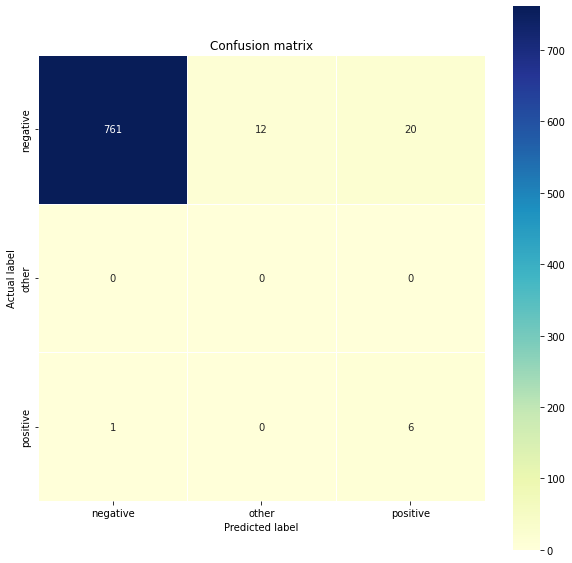

Fold-1


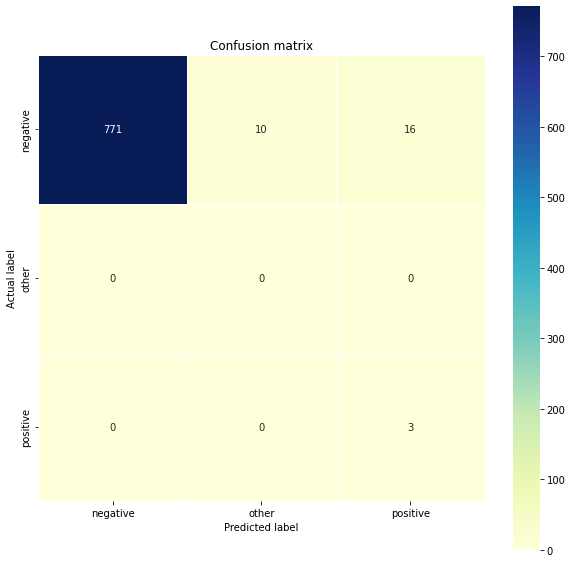

Fold-2


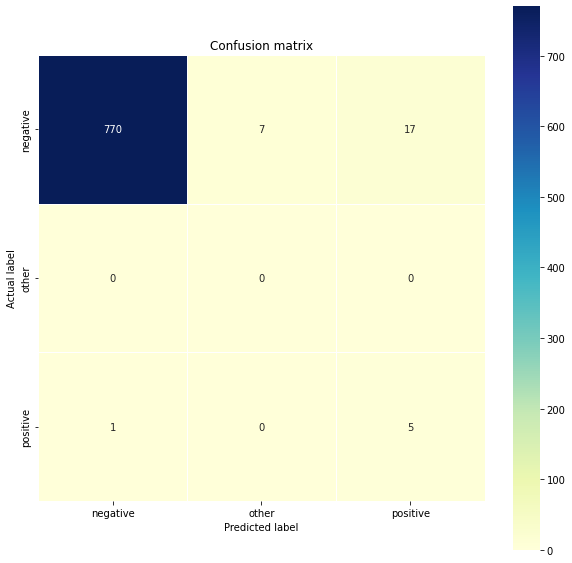

Fold-3


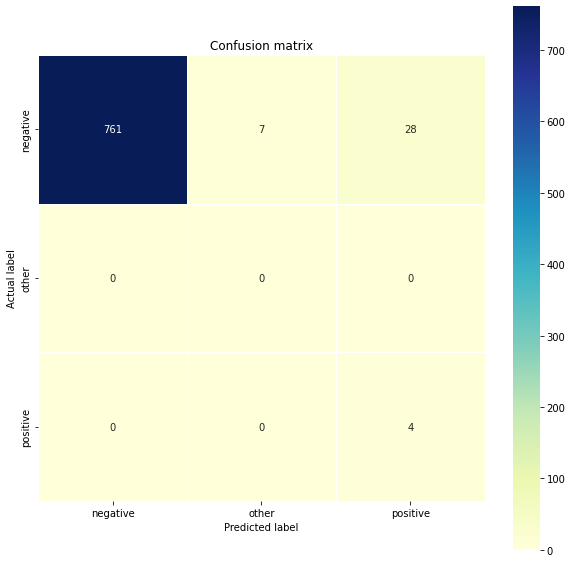

Fold-4


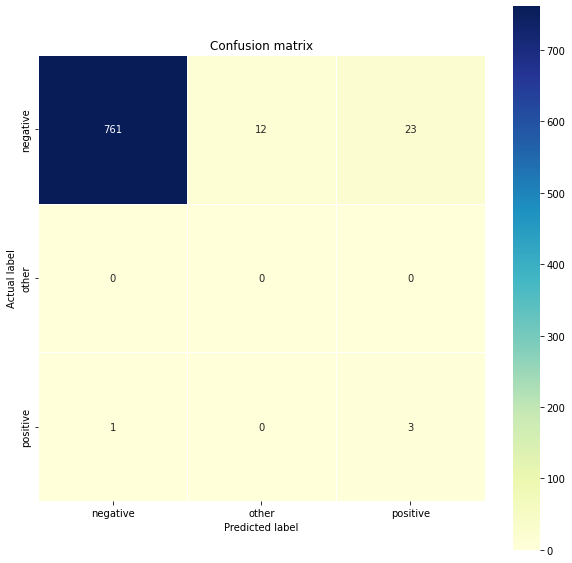

Fold-0 Predicted  negative  other  positive
Actual                              
negative        761     12        20
other             0      0         0
positive          1      0         6
Fold-1 Predicted  negative  other  positive
Actual                              
negative        771     10        16
other             0      0         0
positive          0      0         3
Fold-2 Predicted  negative  other  positive
Actual                              
negative        770      7        17
other             0      0         0
positive          1      0         5
Fold-3 Predicted  negative  other  positive
Actual                              
negative        761      7        28
other             0      0         0
positive          0      0         4
Fold-4 Predicted  negative  other  positive
Actual                              
negative        761     12        23
other             0      0         0
positive          1      0         3
Recall, Precision and F1-score for fold-

In [16]:
def get_accuracy(data):
    """Calculate accuracy of each fold
    @param data: result of train_df or test_df in one_rule_classifier
    @return: accuracy of each fold
    """
    feature_list = list(set(data[0]['Feature']))
    feature_group = []
    train_rules = list()

    # Iterate over each fold
    for index, value in enumerate(data):
        feature_group.append(value.groupby(['Feature']).sum().reset_index())

        # Calculating Total and Accuracy
        # df.sum(axis=1) sums up each row; df.div(..., axis=0) then divides.
        feature_group[index]['Total'] = feature_group[index].sum(axis=1)
        feature_group[index]['Accuracy'] = feature_group[index].Frequency / \
            feature_group[index].Total

        # temp intermediate dataframe to easily access accuracy
        inter_df = feature_group[index]

        temp_train_rules = list()
        # Defining train_rules for each feature
        for item in feature_list:

            intermediate_train_rule = value.iloc[value.values == item].groupby(
                ['Value', 'Predict']).apply(lambda a: a[:])

            # print(intermediate_train_rule.reset_index(drop=True))
            # print("index",index, inter_df[inter_df['Feature'] == item])

            temp_train_rules.append({"feature": item, "accuracy": inter_df[inter_df['Feature'] == item]['Accuracy'].values[0], "train_rules": dict(
                zip(intermediate_train_rule.Value, intermediate_train_rule.Predict))})

        # Append each set of train_rules in K-indexed list
        train_rules.append(pd.DataFrame(temp_train_rules))
    return train_rules, feature_group

def get_all_rules(train_data_rule):
    """Get all acquired rules from data in each fold
    @param train_data_rule: result of train_dataframe in one_rule_classifier
    @return: all rules in each fold
    """
    for index, value in enumerate(train_data_rule):
        print("Fold: ", index)
        for item in value.itertuples():
            print("Feature: ", item.feature, "Accuracy: ", item.accuracy,
                  "Train Rules:\n", *[(f"if {item.feature} = {key} -> corona result = {value}\n") for key, value in item.train_rules.items()])

def get_max_accuracy_rules(data_rules):
    """Get rules for [maximum accuracy|major] class
    @param data_rules: result of train_dataframe in one_rule_classifier
    @return: rules for [maximum accuracy|major] class
    """
    max_accuracy_rules = list()
    max_row_feature_list = list()

    for index, value in enumerate(data_rules):
        max_row = value.loc[:, 'accuracy'].idxmax()
        max_row_feature = value.loc[max_row, 'feature']
        max_row_accuracy = value.loc[max_row, 'accuracy']
        max_row_data_rules = value.loc[max_row, 'train_rules']
        print(f"Major class in fold-{index}:",
              max_row_feature, ", accuracy:", max_row_accuracy, ",\nrules:",  *[(f"if {max_row_feature} = {key} -> corona_result = {value}\n") for key, value in max_row_data_rules.items()])
        max_row_feature_list.append(max_row_feature)
        max_accuracy_rules.append(pd.DataFrame([(key, value) for key, value in max_row_data_rules.items()], columns=['value', 'result']))
    return max_accuracy_rules, max_row_feature_list

# Generating rules for train_data
train_rules, feature_group = get_accuracy(train_data_classified)
# get_all_rules(train_rules)
# get_max_accuracy_rules(train_rules)

# Generating rules for test_data
test_rules, feature_group = get_accuracy(test_data_classified)
predict_rules, row_feature_list = get_max_accuracy_rules(test_rules)

def apply_rules(data, rules, row_feature_list):
    """Applies rules to test data and returns predicted result
    @param data: test data
    @param rules: rules for test data
    @param row_feature_list: list of features in test data
    @return: predicted result
    """
    for index, value in enumerate(data):
        y_pred = list()    
        for x in value[row_feature_list[index]]:
            for rule in rules[index]['value']:
                if x == rule:
                    y_pred.append(rules[index][rules[index]['value'] == x]['result'].values[0])
        value['y_pred'] = pd.DataFrame(y_pred)
    return data

def get_confusion_matrix(data):
    """Get confusion matrix for test data
    @param data: test data
    @return: confusion matrix
    """
    confusion_matrix = list()
    c_index =list()
    for index, value in enumerate(data):
        confusion_matrix.append(pd.crosstab(
            value['y_pred'], value['corona_result'], rownames=["Actual"], colnames=["Predicted"]))
        
        c_index.append(pd.crosstab(
            value['corona_result'], value['y_pred'], rownames=["Actual"], colnames=["Predicted"]))    
    return confusion_matrix, c_index

def post_processing(matrix, index_matrix):
    """Process data for incosistency
    @param matrix: confusion matrix
    @param index_matrix: index matrix
    """
    for index, value in enumerate(matrix):
        # matrix[index] = matrix[index].iloc[:, ::-1]
        # index_matrix[index] = index_matrix[index].reindex(index=index_matrix[index].index[::-1])
        matrix[index] = value.reindex(index_matrix[index].index, fill_value=0)
    index_matrix = matrix
    return matrix, index_matrix

test_set = apply_rules(x_test, predict_rules, row_feature_list)
confusion_matrix, c_index = get_confusion_matrix(test_set)
confusion_matrix, temp_matrix = post_processing(confusion_matrix, c_index)

def show_confusion_matrix(matrix):
    """Plot confusion matrix
    @param matrix: confusion matrix
    """
    plt.figure(figsize=(10, 10))
    sns.heatmap(matrix, annot=True, fmt=".0f", linewidths=.5, square=True, cmap="YlGnBu")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix')
    plt.show()
    
def iterate_confusion_matrix_fold(matrix):
    """Iterate over each fold and print confusion matrix
    @param matrix: confusion matrix
    """
    for index, value in enumerate(matrix):
        print(f"Fold-{index}")
        show_confusion_matrix(value)

iterate_confusion_matrix_fold(confusion_matrix)

def get_recall_precision_f1_score(data, index_matrix):
    """Calculate recall, precision, accuracy and f1-score
    @param data: test data
    @param temp_matrix: index matrix
    """
    recall_precision_f1_score = list()
    for index, value in enumerate(data):
        TP = np.diag(value)
        FP = np.sum(value, axis=0) - TP
        FN = np.sum(value, axis=1) - TP
        TN = np.sum(value) - (FP + FN + TP)
        print(f"Fold-{index}", index_matrix[index])
        recall_precision_f1_score.append(pd.DataFrame(columns=[index_matrix[index]],index=['Recall:', 'Precision:', 'Accuracy:', 'F1-score:']))

        for class_index, value in enumerate(index_matrix[index]):
            recall_precision_f1_score[index].loc['Recall:', value] = TP[class_index] / (TP[class_index] + FN[class_index])
            recall_precision_f1_score[index].loc['Precision:', value] = TP[class_index] / (TP[class_index] + FP[class_index])
            recall_precision_f1_score[index].loc['Accuracy:', value] = (TP[class_index] + TN[class_index]) / (TP[class_index] + TN[class_index] + FP[class_index] + FN[class_index])
            recall_precision_f1_score[index].loc['F1-score:', value] = 2 * TP[class_index] / (2 * TP[class_index] + FP[class_index] + FN[class_index])
        # micro-averaging                
        recall_precision_f1_score[index].loc['Recall:', 'Micro-averaging'] = np.sum(TP) / (np.sum(TP) + np.sum(FN))
        recall_precision_f1_score[index].loc['Precision:', 'Micro-averaging'] = np.sum(TP) / (np.sum(TP) + np.sum(FP))
        recall_precision_f1_score[index].loc['Accuracy:', 'Micro-averaging'] = (np.sum(TP) + np.sum(TN)) / (np.sum(TP) + np.sum(TN) + np.sum(FP) + np.sum(FN))
        recall_precision_f1_score[index].loc['F1-score:', 'Micro-averaging'] = 2 * np.sum(TP) / (2 * np.sum(TP) + np.sum(FP) + np.sum(FN))
        # macro-averaging
        recall_precision_f1_score[index].loc['Recall:', 'Macro-averaging'] = np.mean(TP / (TP + FN))
        recall_precision_f1_score[index].loc['Precision:', 'Macro-averaging'] = np.mean(TP / (TP + FP))
        recall_precision_f1_score[index].loc['Accuracy:', 'Macro-averaging'] = (np.sum(TP) + np.sum(TN)) / (np.sum(TP) + np.sum(TN) + np.sum(FP) + np.sum(FN))
        recall_precision_f1_score[index].loc['F1-score:', 'Macro-averaging'] = 2 * np.mean(TP / (2 * TP + FP + FN))
    return recall_precision_f1_score

confusion_matrix = np.array(confusion_matrix)

# iterate over each fold
for index, value in enumerate(get_recall_precision_f1_score(confusion_matrix, temp_matrix)):
    print(f"Recall, Precision and F1-score for fold-{index}:\n", value)

# "Decision Tree - ID3" with SKLearn

          negative  other  positive
negative      1528      0         0
other            0     22         0
positive         0      0        50
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1-score: 1.0
Recall: 1.0
Precision: 1.0
F1-score: 1.0
check model overfit or underfit:  1.0


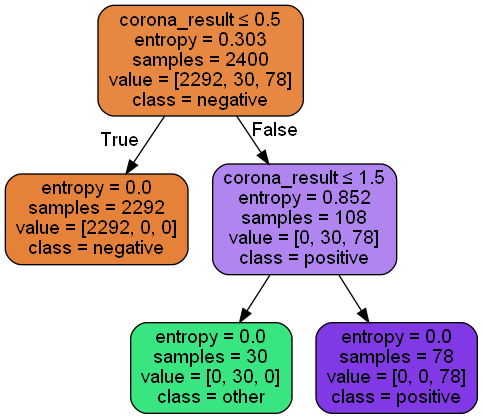

In [17]:
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from six import StringIO
import matplotlib.pyplot as plt
from IPython.display import Image  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

df = pd.read_csv("data_set.csv")
# df = df.fillna('[NULL]')
df = df.fillna(method='bfill')
df.drop('test_date', axis=1, inplace=True)

feature_or_column_names = list(df.columns.values[:-1])

# df['corona_result'].replace(
#     to_replace=['negative', 'positive', 'other'], value=[0, 1, 2], inplace=True)

# replace label with label encoder
le = LabelEncoder()
df['corona_result'] = le.fit_transform(df['corona_result'])
# print(df['corona_result'])

# replace features with one hot encoder 
X = pd.get_dummies(df, columns=feature_or_column_names)
feature_or_column_names = list(X.columns.values)
y = df['corona_result']

# df.drop('age_60_and_above_[NULL]', axis=1, inplace=True)
# df.drop('', axis=1, inplace=True)
# print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=20)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix = pd.DataFrame(conf_matrix, index=['negative','other','positive'], columns=['negative','other','positive'])
print(conf_matrix)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred, average='micro'))
print("Precision:",precision_score(y_test, y_pred, average='micro'))
print("F1-score:",f1_score(y_test, y_pred, average='micro'))
print("Recall:",recall_score(y_test, y_pred, average='macro'))
print("Precision:",precision_score(y_test, y_pred, average='macro'))
print("F1-score:",f1_score(y_test, y_pred, average='macro'))

print("check model overfit or underfit: ", clf.score(X_test, y_test))

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=feature_or_column_names, class_names=['negative', 'other', 'positive'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('tree.png')
Image(graph.create_png())

>=============== Confusion Matrix ===============<
Accuracy: 0.9825
          negative  other  positive
negative      1521      0         0
other            0     16         2
positive         0     26        35
>=============== Micro-Averaging ===============<
Recall: 0.9825
Precision: 0.9825
F1-score: 0.9825
>=============== Macro-Averaging ===============<
Recall: 0.8208864602307225
Precision: 0.7756327756327757
F1-score: 0.7492063492063492


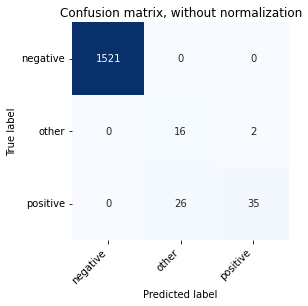

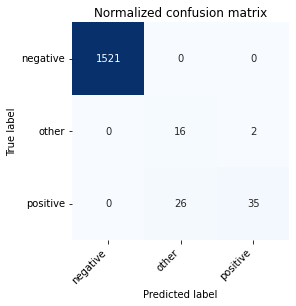

In [18]:
import six, sys
sys.modules['sklearn.externals.six'] = six # the dependency needs to be changed by the Id3Estimator maintainers
from id3 import Id3Estimator # another implementation of Id3 tree algorithm
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score # metrics

df = pd.read_csv("data_set.csv")
df = df.fillna(method='bfill')
df.drop('test_date', axis=1, inplace=True)
feature_or_column_names = list(df.columns.values[:-1])

# for categorical data
estimator = Id3Estimator()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

classification_fit = estimator.fit(X_train, y_train)
y_pred = classification_fit.predict(X_test)

# confussion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, index=['negative','other','positive'], columns=['negative','other','positive'])

print(">=============== Confusion Matrix ===============<")
print("Accuracy:",accuracy_score(y_test, y_pred))
print(conf_matrix)

print(">=============== Micro-Averaging ===============<")
print("Recall:",recall_score(y_test, y_pred, average='micro'))
print("Precision:",precision_score(y_test, y_pred, average='micro'))
print("F1-score:",f1_score(y_test, y_pred, average='micro'))
print(">=============== Macro-Averaging ===============<")
print("Recall:",recall_score(y_test, y_pred, average='macro'))
print("Precision:",precision_score(y_test, y_pred, average='macro'))
print("F1-score:",f1_score(y_test, y_pred, average='macro'))

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='d',
                       square=True, cbar=False)
    disp.yaxis.set_ticklabels(disp.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    disp.xaxis.set_ticklabels(disp.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Decision Tree from scratch

In [19]:
import numpy as np
import pandas as pd

In [129]:
data_frame = pd.read_csv('data_set.csv')
data_frame = data_frame.fillna(method='bfill')
# temp_df = data_frame.copy()

data_frame.drop('test_date', axis=1, inplace=True)

# X = temp_df.drop('corona_result', axis=1)
# y = temp_df[['corona_result']]

feature_columns = list(data_frame.columns.values[:-1])
label = list(data_frame.columns[-1:])

# print(feature_columns, label)

x_train, x_test, y_train, y_test = k_fold(5, data_frame)

train_df, test_df = concat_data(x_train, x_test, y_train, y_test)

for index, value in enumerate(x_train):
    print(x_train[index].shape, y_train[index].shape, x_test[index].shape, y_test[index].shape)
    # print(print_dataset(value))

(3200, 9) (3200, 1) (800, 9) (800, 1)
(3200, 9) (3200, 1) (800, 9) (800, 1)
(3200, 9) (3200, 1) (800, 9) (800, 1)
(3200, 9) (3200, 1) (800, 9) (800, 1)
(3200, 9) (3200, 1) (800, 9) (800, 1)


In [130]:
def entropy(column_data) -> float:
    """ Calculate the entropy of the label i.e. corona_result
    @param column_data: pandas series
    @return: entropy of the column_data is returned
    """
    unique_column_data = np.unique(column_data)
    entropy = 0
    for unique_value_in_column in unique_column_data:
        probability_i = np.mean(column_data == unique_value_in_column)
        if probability_i != 0:
            # print(len(column_data))
            # print(len(column_data[column_data == unique_value_in_column].values))
            # print(probability_i)
            entropy += -probability_i * np.log2(probability_i)
    return entropy

def entropy_of_feature(data_frame, feature_column):
    """Calculate the entropy of data and feature column for Information Gain
    @param data_frame: pandas dataframe
    @param feature_columns: list of columns
    @return: entropy of the data is returned
    """
    dict_of_entropy = {}
    label_variables = np.unique(data_frame[data_frame.columns[-1:]])
    column_variables = np.unique(data_frame[feature_column].values)
    for column_variable in column_variables:
        entropy_of_column = 0
        for label_variable in label_variables:
            entropy = 0
            probability_i = np.mean(data_frame[data_frame[feature_column] == column_variable][data_frame.columns[-1:]] == label_variable)
            if probability_i[0] != 0:
                entropy += -probability_i[0] * np.log2(probability_i[0])
            entropy_of_column += probability_i[0] * entropy
        dict_of_entropy[column_variable] = entropy_of_column

    # print(f">==== feature: {feature_column} ====<")
    # [print(key, "{:.4f}".format(value)) for key, value in dict_of_entropy.items()]
    # print("Sum:", sum(dict_of_entropy.values()))
    return sum(dict_of_entropy.values())

for index, value in enumerate(x_train):
    print(f">=============== fold-{index} ===============<")
    max_entropy = list()
    for feature in feature_columns:
        # print(f"{feature}: {entropy(x_train[index], feature)}")
        max_entropy.append(entropy_of_feature(x_train[index], feature))
    # feature with max entropy
    print(f"feature with max entropy: {feature_columns[max_entropy.index(max(max_entropy))]}", f"max_entropy: {max(max_entropy)}")
        
def missclassification_error(column_data):
    """
    @param column_data: pandas series
    @return: error of the column_data is returned
    """
    unique_column_data = np.unique(column_data)
    error = 0
    for unique_value_in_column in unique_column_data:
        p_i = np.mean(column_data == unique_value_in_column)
        if p_i != 0:
            error += 1 - np.max([p_i, 1 - p_i])
    return error

# print("Misclassification Error: ", missclassification_error(x_train[0].corona_result))

# # entropy of 
# def entropy_of_features(data_frame, column) -> pd.DataFrame:
#     for index, column in enumerate(data_frame.columns):
#         print(column)

# entropy_of_features(train_df[0], 'corona_result')

# # Iterate over differnt folds
# # for index, _ in enumerate(x_train):
# #     print("label column entropy: {:.2f}".format(entropy(x_train[index].corona_result)))
# #     print(entropy_of_features(train_df[index]))

>=============== fold-0 ===============<
feature with max entropy: fever max_entropy: 0.537177687944285
>=============== fold-1 ===============<
feature with max entropy: test_indication max_entropy: 0.885136502861944
>=============== fold-2 ===============<
feature with max entropy: test_indication max_entropy: 0.893420769663887
>=============== fold-3 ===============<
feature with max entropy: test_indication max_entropy: 1.0327878977840474
>=============== fold-4 ===============<
feature with max entropy: test_indication max_entropy: 0.5308435051911803


In [140]:
def find_feature_with_max_information_gain(data_frame):
    """ Find the feature with the highest information gain
    @param data_frame: pandas dataframe
    @param feature_columns: list of feature names
    @return: feature with the highest information gain is returned
    """
    entropy_of_data_frame = entropy(data_frame[data_frame.columns[-1]])
    columns = data_frame.columns[:-1]
    IG = list()
    for _, value in enumerate(columns):
        entropy_feature = entropy_of_feature(data_frame, value)
        information_gain = entropy_of_data_frame - entropy_feature
        IG.append(information_gain)
    return data_frame.columns[IG.index(max(IG))]

for index, value in enumerate(train_df):
    print(f"=============== fold-{index} ===============")
    print(f"feature with max information gain: {find_feature_with_max_information_gain(train_df[index])}")

def get_subset_data_frame(data_frame, column_name, unique_value):
    """ Subset the data frame based on the unique values in the column
    @param data_frame: pandas dataframe
    @param column_name: name of the column
    @param unique_values: list of unique values in the column
    @return: subset of the data frame is returned
    """
    return data_frame[data_frame[column_name] == unique_value]

def is_label_value_equal_one(data) -> bool:
    return True if len(data) == 1 else False

# def ID3_decision_tree(data_frame, tree=None):
#     """ Build the ID3 Decision Tree for categorical data
#     @param data_frame: pandas dataframe
#     @param feature_columns: list of feature names
#     @param depth: depth of the tree
#     @return: ID3 Decision Tree is returned
#     """
#     label = data_frame.columns[-1]
#     max_information_gain_feature = find_feature_with_max_information_gain(data_frame)
#     unique_values = np.unique(data_frame[max_information_gain_feature])

#     for index, unique_value in enumerate(unique_values):
#         subset_data_frame = get_subset_data_frame(data_frame, max_information_gain_feature, unique_value)
#         # print(f"subset_data_frame: {subset_data_frame.shape}")
#         class_value, counts = np.unique(subset_data_frame[subset_data_frame.columns[-1]], return_counts=True)
#         print(f"{max_information_gain_feature} = {class_value}")
#         # create tree to call recursively
#         if tree is None:
#             tree = {max_information_gain_feature: {unique_value: {}}}
#         else:
#             tree[max_information_gain_feature][unique_value] = {}

#         if is_label_value_equal_one(class_value):
#             tree[max_information_gain_feature][unique_value] = class_value[0]
#         else:
#             ID3_decision_tree(subset_data_frame, tree[max_information_gain_feature][unique_value])
#     return tree

def ID3_decision_tree(data_frame, tree=None):
    """ Build the ID3 Decision Tree for categorical data
    @param data_frame: pandas dataframe
    @param feature_columns: list of feature names
    @param depth: depth of the tree
    @return: ID3 Decision Tree is returned
    """
    label = data_frame.columns[-1]
    if is_label_value_equal_one(data_frame[label].values):
        return data_frame[label].values[0]
    else:
        feature = find_feature_with_max_information_gain(data_frame)
        tree = {feature: {}}
        unique_values = np.unique(data_frame[feature].values)
        for unique_value in unique_values:
            sub_tree = get_subset_data_frame(data_frame, feature, unique_value)
            sub_tree_label = sub_tree[label].values
            sub_tree_label = sub_tree_label[0] if is_label_value_equal_one(sub_tree_label) else ID3_decision_tree(sub_tree)
            tree[feature][unique_value] = sub_tree_label
        return tree


tree_list = []
for index, data_frame in enumerate(x_train):
    print(ID3_decision_tree(data_frame))

=============== fold-0 ===============
feature with max information gain: shortness_of_breath
=============== fold-1 ===============
feature with max information gain: shortness_of_breath
=============== fold-2 ===============
feature with max information gain: shortness_of_breath
=============== fold-3 ===============
feature with max information gain: shortness_of_breath
=============== fold-4 ===============
feature with max information gain: shortness_of_breath


KeyboardInterrupt: 

In [ ]:


for index, value in enumerate(dataset):
    print(is_label_value_equal_one(np.unique(value[:,-1])))
    unique_labels, counts_unique_labels = np.unique(value[:,-1], return_counts=True)
    print(unique_labels)
    print(counts_unique_labels.argmax())


In [ ]:

# def get_information_gain(data):
#     """
#     Calculate information gain for each feature
#     """
#     information_gain = list()
#     for index, value in enumerate(data):
#         information_gain.append(pd.DataFrame(columns=[value.columns], index=['Information Gain']))
#         for class_index, value in enumerate(value.columns):
#             information_gain[index].loc['Information Gain', value] = entropy(data[index].iloc[:, class_index]) - np.sum(data[index].iloc[:, class_index] * entropy(data[index].iloc[:, class_index])) / np.sum(data[index].iloc[:, class_index])
#     return information_gain

# def entropy(data):
#     """
#     Calculate entropy for each feature
#     """
#     entropy = list()
#     for index, value in enumerate(data):
#         print(data[index])
#         # entropy.append(pd.DataFrame(columns=[value.columns], index=['Entropy']))
#         # for class_index, value in enumerate(value.columns):
#         #     entropy[index].loc['Entropy', value] = -np.sum(data[index].iloc[:, class_index] * np.log2(data[index].iloc[:, class_index]))
#     return entropy

#     """
#     Return information gain for each fold
#     """
#     information_gain = list()
#     for index, value in enumerate(x_train):
#         for name, column in value.iteritems():

# print(get_information_gain(x_train))

# PRISM rule-based Classification

In [ ]:
df = load()
temp_df = df.copy()
# print_dataset(df)
x_train, x_test, y_train, y_test = k_fold(1, df)
train_df, test_df = concat_data(x_train, x_test, y_train, y_test)

for index, _ in enumerate(x_train):
    print(x_train[index].shape, y_train[index].shape, x_test[index].shape, y_test[index].shape,"\n" )
    print(train_df[index], test_df[index])

